In [1]:
!pwd

/kaggle/working


In [2]:
import os 
import numpy as np

# 1. Importing Dataset and Labels

In [3]:
# Importing the labels in .npy format 
print("Importing .npy labels")
file_path_npy = '/kaggle/input/ahmethan/labels1.npy'
labels_npy = np.load(file_path_npy, allow_pickle=True)
print((f"the len of labels_npy {len(labels_npy)}"))
print(f"the type of the label_npy is {type(labels_npy)}\n")

# Importing the labels in .txt format
print("Importing .txt labels")
file_path_txt = os.listdir('/kaggle/input/labels1/labels')
print(f"the len of label_txt {len(file_path_txt)}") # it needs to be sorted
labels_txt = sorted(file_path_txt)
print(f"the type of the labels_txt is {type(labels_txt)}\n")

# Importing the images in .jpg (original format)
print("Importing .jpg imges")
images_path = os.listdir('/kaggle/input/dataset-vehicle1/images') # it needs to be sorted
print(f"the len of images list {len(images_path)}") 
images_list = sorted(images_path)
print(f"the type of the labels_txt is {type(images_list)}\n")

Importing .npy labels
the len of labels_npy 8218
the type of the label_npy is <class 'numpy.ndarray'>

Importing .txt labels
the len of label_txt 8219
the type of the labels_txt is <class 'list'>

Importing .jpg imges
the len of images list 8219
the type of the labels_txt is <class 'list'>



In [401]:
for i in range(len(labels_txt)):
    if labels_txt[i] == 'classes.txt':
               print(i)
    

4411


In [402]:
print(labels_txt[4411])

classes.txt


In [403]:
labels_txt.remove(labels_txt[4411])

In [404]:
len(labels_txt)

8218

In [392]:
print(len(images_list))

8218


In [397]:
images_list[7000]

'ulu2305_jpg.rf.3e366e6134b99514819d39a063e5e773.jpg'

In [398]:
labels_txt[7000]

'ulu2304_jpg.rf.a2ac2361e260a982bdd57d8097c12d6d.txt'

In [4]:
# Checking the validity of images list and the corresponding labels list
print(labels_txt[500])
print(images_list[500])


Highway_117_2020-07-30_jpg.rf.46d77343ef898e15519abd22dc1c45ee.txt
Highway_117_2020-07-30_jpg.rf.46d77343ef898e15519abd22dc1c45ee.jpg


In [5]:
# Removing .txt file from images list
for i in range(len(images_list)):
      if images_list[i].endswith(".txt"):
            print(f"the index of the .txt file is {i}")



the index of the .txt file is 5694


In [6]:
# Checking the 5694 index of images_list
images_list[5694]

'train.txt'

In [7]:
# Removing the 5694 index of images_list
# Please DO NOT run this line of code more than 1 time!
images_list.remove(images_list[5694])

In [8]:
# Checking the 5694 index of images_list after removing the .txt file
images_list[5694]

'ulu0_jpg.rf.fa56a0f31c0eb2390fe1096028be63e4.jpg'

In [9]:
import cv2

# Loading images and associate labels
labeled_images = {}

for i, image_path in enumerate(images_list):
    new_dir = '/kaggle/input/dataset-vehicle1/images'+'/'+image_path
    image = cv2.imread(new_dir)
    label = labels_npy[i] 
#     elif i >= 5694:
#         image = cv2.imread(image_path)
#         label = labels[i+1]  # Get the corresponding label from the loaded labels array

    labeled_images[image_path] = {'image': image, 'label': label}

# 2. Dataset Analyzing

 the image size is (408, 408, 3)
[[3.       0.509804 0.411765 0.107843 0.245098]
 [2.       0.210784 0.616422 0.127451 0.232843]]


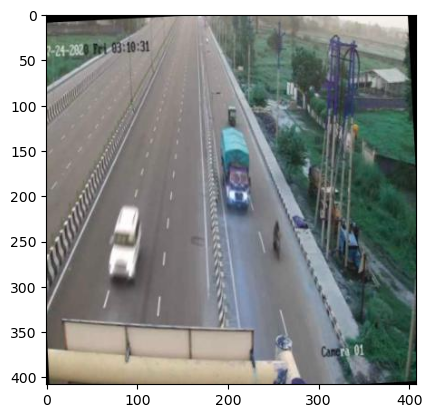

In [10]:
# Checking the image
import matplotlib.pyplot as plt
image_test = labeled_images['Highway_0_2020-07-30_jpg.rf.09e9d4467f17b2b870a5d1b94a38774a.jpg']
image = image_test['image']
label = image_test['label']
print(f" the image size is {image.shape}")
print(label)
plt.imshow(image)

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [12]:
import torchvision.transforms as transforms
from torchvision.transforms import v2
import pathlib
import torch
import torchvision
import pathlib
from collections import defaultdict
import PIL.Image
import torch
import torch.utils.data
import torchvision
from torchvision import models, datasets
import torchvision.transforms.v2 as transforms

/opt/conda/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/opt/conda/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https:/

In [13]:
# Defining the bounding box
bbox_1 = label[0]
bbox_2 = label[1]
print(bbox_1,'\n')
print(bbox_2)

[3.       0.509804 0.411765 0.107843 0.245098] 

[2.       0.210784 0.616422 0.127451 0.232843]


In [14]:
def bbox_draw(bbox, shape):
    class_id, center_x_normalized, center_y_normalized, width_normalized, height_normalized = bbox
    
    center_x_pixel = int(center_x_normalized * shape[0])
    center_y_pixel = int(center_y_normalized * shape[1])
    width_pixel = int(width_normalized * shape[0])
    height_pixel = int(height_normalized * shape[1])

    # Convert center coordinates to top-left coordinates
    top_left_x = center_x_pixel - width_pixel // 2
    top_left_y = center_y_pixel - height_pixel // 2

    # Convert center coordinates to bottom-right coordinates
    bottom_right_x = center_x_pixel + width_pixel // 2
    bottom_right_y = center_y_pixel + height_pixel // 2

    bbox_pascal_voc = [top_left_x, top_left_y, bottom_right_x  ,bottom_right_y  , class_id]
    color = (255, 0, 0)  # Green color for bounding box
    img = cv2.rectangle(image, (top_left_x, top_left_y), (bottom_right_x, bottom_right_y), color, 2)

    return img, [bbox_pascal_voc]

In [15]:
first_bbox = bbox_draw(bbox_1, image.shape)
second_bbox = bbox_draw(bbox_2, image.shape)

In [16]:
first_bbox[1]

[[187, 119, 229, 217, 3.0]]

In [17]:
print(f"pixel values for first image and its class id {first_bbox[1]}")

pixel values for first image and its class id [[187, 119, 229, 217, 3.0]]


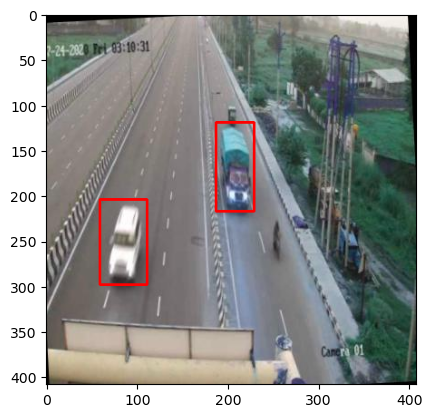

In [18]:
plt.imshow(first_bbox[0])

In [19]:
import albumentations as A

# Define the augmentation pipeline
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.7, p=0.5),
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=0.5),
    A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, angle_upper=1, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.5),
    A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2.5, p=0.5),
    A.CLAHE(p=0.5),
    A.GridDistortion(p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),

], bbox_params=A.BboxParams(format='pascal_voc'))


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [20]:
len(first_bbox[1])

1

In [21]:
augmented = transform(image= first_bbox[0], bboxes= first_bbox[1])
augmented_image = augmented['image']
augmented_bboxes = augmented['bboxes']

In [22]:
import cv2
import matplotlib.pyplot as plt

def display_image_with_bboxes(img, bboxes, labels=None):
    
    for idx, bbox in enumerate(bboxes):
        x_min, y_min, x_max, y_max = map(int, bbox[:-1])
        
        color = (0, 255, 0)  # Green color for bounding boxes
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color, 2)

    plt.imshow(img)
    plt.axis('off')
    plt.show()

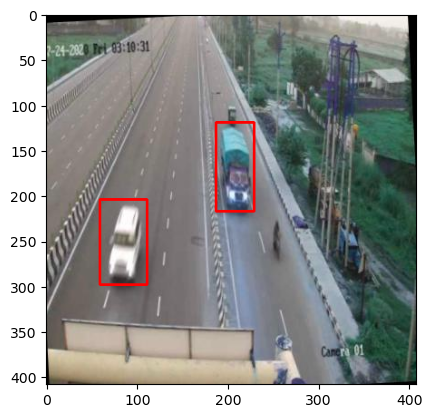

In [23]:
# Original image
plt.imshow(first_bbox[0])

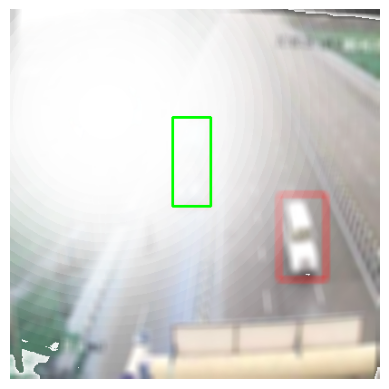

In [24]:
# Augmented image
aug_image = display_image_with_bboxes(augmented_image, augmented_bboxes)

In [25]:
labels_npy[0][0][0]

3.0

In [26]:
# Figuring out the number of each class in the given dataset
auto = 0
bus = 0
car = 0
lcv = 0
motorcycle = 0
multiaxle = 0
tractor = 0
truck = 0

for idx, label in enumerate(labels_npy):
    for j in range(len(labels_npy[idx])):
        if labels_npy[idx][j][0] == 0:
            auto += 1 
        if labels_npy[idx][j][0] == 1:
            bus += 1 
        if labels_npy[idx][j][0] == 2:
            car += 1
        if labels_npy[idx][j][0] == 3:
             lcv+= 1
        if labels_npy[idx][j][0] == 4:
            motorcycle += 1
        if labels_npy[idx][j][0] == 5:
            multiaxle += 1
        if labels_npy[idx][j][0] == 6:
            tractor += 1 
        if labels_npy[idx][j][0] == 7:
            truck += 1
            
        

In [27]:
print(auto)
print(bus)
print(car)
print(lcv)
print(motorcycle)
print(multiaxle)
print(tractor)
print(truck)


819
1319
11425
969
7285
1147
171
2963


In [28]:
total = (auto)+(bus)+(car)+(lcv)+(motorcycle)+(multiaxle)+(tractor)+(truck)

print(f"the total amount of vehicle classes {total}")

the total amount of vehicle classes 26098


In [29]:
vehicle_classes = ['auto', 'bus', 'car', 'lcv', 'motorcycle', 'multiaxle', 'tractor', 'truck']
vehicles_qunatity = [819, 1319, 11425, 969, 7285, 1147, 171, 2963]
colors = ['#ff9999','#66b2ff','#99ff99','#ffcc99', '#c2c2f0','#ffb3e6', '#ff6644']

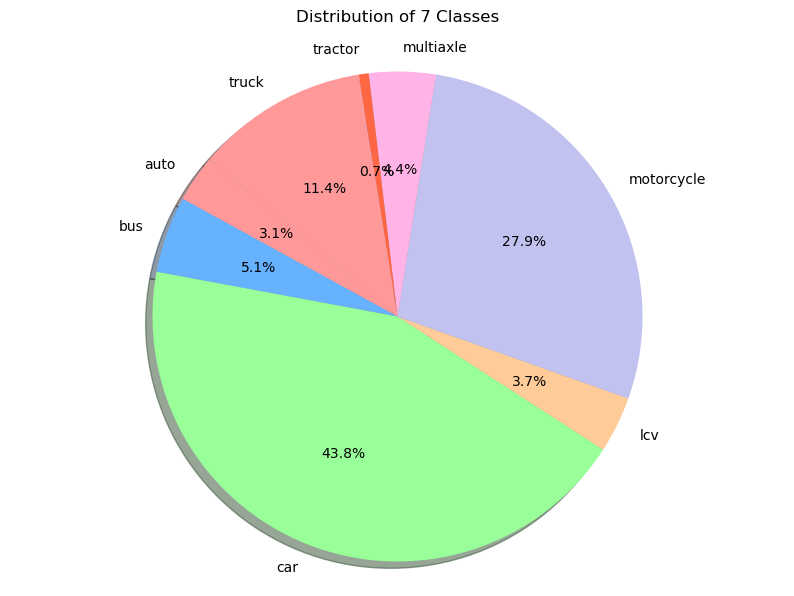

In [30]:
plt.figure(figsize=(10,7))
plt.pie(vehicles_qunatity, labels= vehicle_classes, colors= colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of 7 Classes\n')
plt.show()

# 3. Training The Model

In [31]:
import cv2
import numpy as np
import torch
from torchvision import transforms
from torch.utils.data import Dataset
import albumentations as A
from torch.utils.data import Dataset

In [797]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, RandomBrightnessContrast, Flip, OneOf, Compose
)
from albumentations.pytorch import ToTensorV2

# Define your transformations as before, but now include bbox_params
albu_transform = A.Compose([
    A.HorizontalFlip(),
    A.ShiftScaleRotate(rotate_limit=15,value=0,
    border_mode=cv2.BORDER_CONSTANT),
                           A.CLAHE(),
                           A.GaussNoise(),
    A.LongestMaxSize(max_size=416),
    A.PadIfNeeded(min_height=416, min_width=416, border_mode=0),
    ],
    A.BboxParams(format='pascal_voc', label_fields=['labels']))
#     bbox_params={'format': 'pascal_voc', 'label_fields': ['labels']})
    # Your transformations here...
#     A.HorizontalFlip(p=0.5),
#     A.RandomBrightnessContrast(p=0.5),
#     A.Rotate(limit=10, p=0.5),
#     A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.7, p=0.5),
#     A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=0.5),
#     A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, angle_upper=1, p=0.5),
#     A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.5),
#     A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2.5, p=0.5),
#     A.CLAHE(p=0.5),
#     A.GridDistortion(p=0.5),
#     A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),
#     ToTensorV2(p=1.0)
# ], 
    



In [32]:
# Defining Albumentations's transform
albu_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Rotate(limit=10, p=0.5),
    A.RandomRain(slant_lower=-10, slant_upper=10, drop_length=20, drop_width=1, drop_color=(200, 200, 200), blur_value=5, brightness_coefficient=0.7, p=0.5),
    A.RandomFog(fog_coef_lower=0.3, fog_coef_upper=0.7, alpha_coef=0.08, p=0.5),
    A.RandomSunFlare(flare_roi=(0, 0, 1, 0.5), angle_lower=0.5, angle_upper=1, p=0.5),
    A.RandomShadow(shadow_roi=(0, 0.5, 1, 1), num_shadows_lower=1, num_shadows_upper=2, shadow_dimension=5, p=0.5),
    A.RandomSnow(snow_point_lower=0.1, snow_point_upper=0.3, brightness_coeff=2.5, p=0.5),
    A.CLAHE(p=0.5),
    A.GridDistortion(p=0.5),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.5),

], bbox_params=A.BboxParams(format='pascal_voc'))


In [33]:
# Defining PyTorch's transform
torch_transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [34]:
print(f"len of images {len(images_list)} and len of labels {len(labels_npy)}")

len of images 8218 and len of labels 8218


In [35]:
dataset = list(zip(images_list, labels_npy))

In [36]:
class_to_idx = {cls: idx for idx, cls in enumerate(vehicle_classes)}
idx_to_class = {idx: cls for cls, idx in class_to_idx.items()}

In [37]:
print((class_to_idx))

{'auto': 0, 'bus': 1, 'car': 2, 'lcv': 3, 'motorcycle': 4, 'multiaxle': 5, 'tractor': 6, 'truck': 7}


In [38]:
print(idx_to_class)

{0: 'auto', 1: 'bus', 2: 'car', 3: 'lcv', 4: 'motorcycle', 5: 'multiaxle', 6: 'tractor', 7: 'truck'}


In [100]:
images_path = '/kaggle/input/dataset-vehicle1/images'

In [104]:
labels_path = '/kaggle/input/labels1/labels'

In [105]:
labels_path

'/kaggle/input/labels1/labels'

In [159]:
from PIL import Image
import torch

In [881]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

class CustomDataset(Dataset):
    def __init__(self, image_paths, label_paths, classes, transform=None):
        self.image_paths = image_paths
        self.label_paths = label_paths
        self.transform = transform
        self.classes = classes
        self.class_to_idx = {class_name: idx for idx, class_name in enumerate(self.classes)}
        self.idx_to_class = {idx: class_name for class_name, idx in self.class_to_idx.items()}

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and annotations
        img_path = self.image_paths[idx]
        annot_path = self.label_paths[idx]
        
        img = Image.open('/kaggle/input/dataset-vehicle1/images/'+img_path).convert("RGB")
        w, h = img.size
        
        annot_data = pd.read_csv('/kaggle/input/labels1/labels/'+annot_path, delimiter=" ", header=None).values
        class_data = annot_data[:, 0]
        class_idx = class_data
        
#         class_idx = class_data.flatten()

         
        boxes = []
        labels = []
        for bbox in annot_data:
            class_name_or_idx, center_x_normalized, center_y_normalized, width_normalized, height_normalized = bbox
            center_x_pixel = int(center_x_normalized * w)
            center_y_pixel = int(center_y_normalized * h)
            width_pixel = int(width_normalized * w)
            height_pixel = int(height_normalized * h)
            
            # Convert (center_x, center_y, width, height) to (x_min, y_min, x_max, y_max)
            top_left_x = center_x_pixel - width_pixel // 2
            top_left_y = center_y_pixel - height_pixel // 2
            bottom_right_x = center_x_pixel + width_pixel // 2
            bottom_right_y = center_y_pixel + height_pixel // 2

            boxes.append([top_left_x, top_left_y, bottom_right_x, bottom_right_y])
            labels.append(int(class_idx[0].flatten()))
            

        # Apply transformations
        if self.transform is not None:
            try:
                print(f"Index: {idx}, Boxes: {boxes}")
                augmented = self.transform(image=np.array(img), bboxes=boxes, labels=labels)
                img = augmented['image']
                boxes = augmented['bboxes']
                
            except Exception as e:
                print(f"Error at index {idx}: {e}")
           
            
#             boxes = torch.tensor(augmented['bboxes'])
        img = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0
#         img = np.array(img)  # Convert the PIL Image to a numpy ndarray
#         img = torch.from_numpy(img).permute(2, 0, 1).float() / 255.5
        target = {
            "boxes": torch.tensor(boxes, dtype=torch.float32),
            "labels": torch.tensor(labels, dtype=torch.int64),
            "image_id": torch.tensor(idx)
        }
        print(f"Index: {idx}")
        print("Image Shape:", np.array(img).shape)
        print("Boxes:", boxes)
        print("Labels:", labels)

        return img, target


In [882]:
from sklearn.model_selection import train_test_split

train_image_paths, test_image_paths, train_label_paths, test_label_paths = train_test_split(
    images_list, labels_txt, test_size=0.2, random_state=42
)


In [779]:
print(len(images_list))

8218


In [780]:
print(len(labels_txt))

8218


In [756]:
print(f" the len of test set {len(train_image_paths)}, the len of train set {len(test_image_paths)}")

 the len of test set 6574, the len of train set 1644


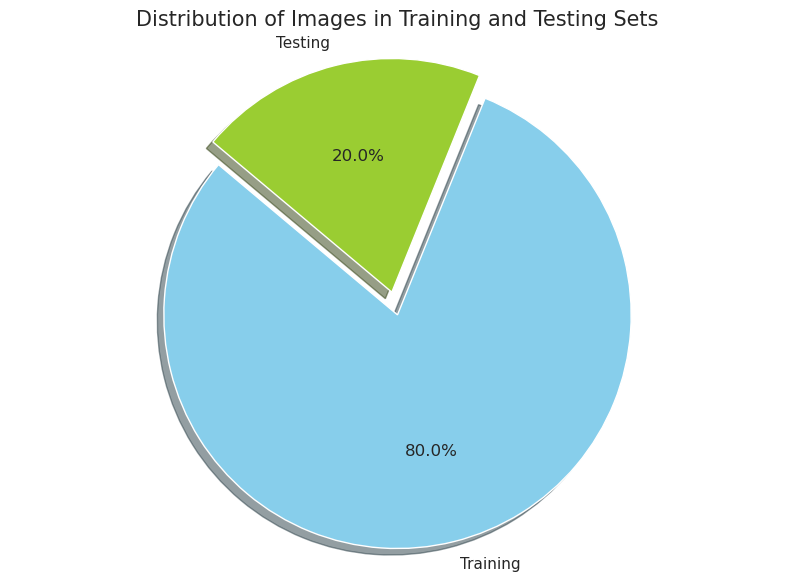

In [711]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
datasets = ['Training', 'Testing']
sizes = [6574, 1644]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  

# Plotting
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")

plt.pie(sizes, explode=explode, labels=datasets, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal') 
plt.title("Distribution of Images in Training and Testing Sets", fontsize=15)
plt.show()


In [883]:
train_dataset = CustomDataset(train_image_paths, train_label_paths, classes=vehicle_classes, transform=albu_transform)
test_dataset = CustomDataset(test_image_paths, test_label_paths, classes=vehicle_classes, transform=albu_transform)
# train_dataset = CustomDataset(train_image_paths, train_label_paths, classes=vehicle_classes)
# test_dataset = CustomDataset(test_image_paths, test_label_paths, classes=vehicle_classes)

In [884]:
# print(train_dataset[5694])
print(train_dataset[6379])

Index: 6379, Boxes: [[8, 174, 112, 344]]
Index: 6379
Image Shape: (3, 416, 416)
Boxes: [(300.6349028906095, 190.66353070001463, 416.0, 387.0994734894777)]
Labels: [1]
(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.3216, 0.3216, 0.3137],
         [0.0000, 0.0000, 0.0000,  ..., 0.3216, 0.3176, 0.3137],
         [0.0000, 0.0000, 0.0000,  ..., 0.3137, 0.3137, 0.3176]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.3490, 0.3451, 0.3412],
         [0.0000, 0.0000, 0.0000,  ..., 0.3490, 0.3451, 0.3373],
         [0.0000, 0.0000, 0.0000,  ..., 0.3529, 0.3451, 0.3412]],

        [[0.0000, 0.

In [885]:
def collate_fn(batch):
    return tuple(zip(*batch))

In [886]:
# training_loader= DataLoader(train_dataset, batch_size=4,shuffle=True,num_workers=os.cpu_count(),
#                     collate_fn=collate_fn,
#                     pin_memory=True if device=="cuda" else False)
# testing_loader = DataLoader(test_dataset, batch_size=4,shuffle=False,num_workers=os.cpu_count(),
#                   collate_fn=collate_fn,
#                   pin_memory=True if device=="cuda" else False)
training_loader= DataLoader(train_dataset, batch_size=4,shuffle=True,num_workers= 0,
                    collate_fn=collate_fn,
                    pin_memory=True if device=="cuda" else False)
testing_loader = DataLoader(test_dataset, batch_size=4,shuffle=False,num_workers=0,
                  collate_fn=collate_fn,
                  pin_memory=True if device=="cuda" else False)

In [887]:
type(training_loader)

torch.utils.data.dataloader.DataLoader

In [677]:
vehicle_classes = ['auto', 'bus', 'car', 'lcv', 'motorcycle', 'multiaxle', 'tractor', 'truck']
class_to_idx = {cls: idx for idx, cls in enumerate(vehicle_classes)}

In [888]:
train_dataset[0]

Index: 0, Boxes: [[56, 206, 110, 332], [138, 70, 154, 94]]
Index: 0
Image Shape: (3, 416, 416)
Boxes: [(317.36512472523515, 205.30781791574583, 394.60195781345664, 345.13447843705035), (248.82132322494195, 77.99424956589951, 269.46227654638466, 105.58962815768479)]
Labels: [2, 2]


(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.4314, 0.4353, 0.4392],
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 0.4471, 0.4471],
          [0.0000, 0.0000, 0.0000,  ..., 0.4471, 0.4431, 0.4510]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.4980, 0.5020, 0.5020],
          [0.0000, 0.0000, 0.0000,  ..., 0.5059, 0.5059, 0.5059],
          [0.0000, 0.0000, 0.0000,  ..., 0.5020, 0.5020, 0.5020]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ...,

In [889]:
train_dataset[1]

Index: 1, Boxes: [[62, 223, 104, 299], [199, 78, 219, 104]]
Index: 1
Image Shape: (3, 416, 416)
Boxes: [(62.60194174757281, 225.16504854368932, 105.00970873786407, 301.90291262135923), (200.93203883495147, 78.75728155339806, 221.126213592233, 105.00970873786407)]
Labels: [2, 2]


(tensor([[[0.0000, 0.0078, 0.0314,  ..., 0.0588, 0.0667, 0.0000],
          [0.0392, 0.0275, 0.0000,  ..., 0.0549, 0.0392, 0.0157],
          [0.0000, 0.0000, 0.0235,  ..., 0.9137, 0.8627, 0.8706],
          ...,
          [0.1686, 0.2275, 0.1882,  ..., 0.6667, 0.5882, 0.3961],
          [0.1373, 0.1529, 0.1451,  ..., 0.5686, 0.3608, 0.2392],
          [0.0431, 0.0275, 0.0000,  ..., 0.4118, 0.2196, 0.0824]],
 
         [[0.0275, 0.0039, 0.0353,  ..., 0.0275, 0.0314, 0.0235],
          [0.0510, 0.0078, 0.0314,  ..., 0.0314, 0.0235, 0.0196],
          [0.0471, 0.0314, 0.0000,  ..., 0.8627, 0.8824, 0.8902],
          ...,
          [0.1451, 0.1608, 0.2000,  ..., 0.7294, 0.6902, 0.5059],
          [0.1725, 0.2078, 0.1765,  ..., 0.6667, 0.4824, 0.3176],
          [0.0000, 0.0000, 0.0039,  ..., 0.4784, 0.2549, 0.1765]],
 
         [[0.0314, 0.0000, 0.0000,  ..., 0.0392, 0.0039, 0.0039],
          [0.0000, 0.0078, 0.0314,  ..., 0.0549, 0.0471, 0.0157],
          [0.0000, 0.0000, 0.0314,  ...,

In [890]:
train_dataset[0][0]

Index: 0, Boxes: [[56, 206, 110, 332], [138, 70, 154, 94]]
Index: 0
Image Shape: (3, 416, 416)
Boxes: [(56.0, 206.0, 110.0, 332.0), (138.0, 70.0, 154.0, 94.0)]
Labels: [2, 2]


tensor([[[0.0235, 0.0000, 0.0157,  ..., 0.0392, 0.0000, 0.0196],
         [0.0353, 0.0000, 0.0000,  ..., 0.0588, 0.0353, 0.0039],
         [0.0000, 0.0510, 0.0196,  ..., 0.0627, 0.0667, 0.0078],
         ...,
         [0.0510, 0.0000, 0.0627,  ..., 0.0471, 0.0000, 0.0314],
         [0.0000, 0.0157, 0.0235,  ..., 0.0000, 0.0275, 0.0039],
         [0.0667, 0.0706, 0.0235,  ..., 0.0588, 0.0314, 0.0235]],

        [[0.0000, 0.0000, 0.0196,  ..., 0.0314, 0.0000, 0.0353],
         [0.0118, 0.0000, 0.0000,  ..., 0.0745, 0.1059, 0.0471],
         [0.0078, 0.0392, 0.0353,  ..., 0.0000, 0.0510, 0.0000],
         ...,
         [0.0196, 0.0000, 0.0471,  ..., 0.0549, 0.0392, 0.0000],
         [0.0000, 0.0353, 0.0118,  ..., 0.0627, 0.0627, 0.0510],
         [0.0353, 0.0824, 0.0314,  ..., 0.0431, 0.0941, 0.0745]],

        [[0.0000, 0.0157, 0.0000,  ..., 0.0392, 0.0510, 0.0510],
         [0.0000, 0.0471, 0.0118,  ..., 0.0549, 0.0039, 0.0549],
         [0.0392, 0.0314, 0.1020,  ..., 0.0549, 0.0471, 0.

In [861]:
train_dataset[0][1]

Index: 0
Image Shape: (3, 416, 416)
Boxes: [[56, 206, 110, 332], [138, 70, 154, 94]]
Labels: [2, 2]


{'boxes': tensor([[ 56., 206., 110., 332.],
         [138.,  70., 154.,  94.]]),
 'labels': tensor([2, 2]),
 'image_id': tensor(0)}

In [891]:
image_test = labeled_images['Highway_823_2020-07-30_jpg.rf.daf1e02d85aac9e064d236b4900b109e.jpg']
image = image_test['image']
label = image_test['label']
print(f" the image size is {image.shape}")
print(label)
# plt.imshow(image)

 the image size is (416, 416, 3)
[[2.       0.23125  0.401563 0.079167 0.08125 ]
 [2.       0.167708 0.2375   0.05625  0.04375 ]
 [2.       0.753125 0.632812 0.16875  0.234375]
 [2.       0.34375  0.379688 0.091667 0.0875  ]
 [4.       0.433333 0.635938 0.066667 0.11875 ]
 [2.       0.215625 0.254688 0.052083 0.05    ]]


In [892]:
sample_img, sample_target = train_dataset[0]
print(type(sample_img))
print(sample_target)

Index: 0, Boxes: [[56, 206, 110, 332], [138, 70, 154, 94]]
Index: 0
Image Shape: (3, 416, 416)
Boxes: [(56.0, 206.0, 110.0, 332.0), (138.0, 70.0, 154.0, 94.0)]
Labels: [2, 2]
<class 'torch.Tensor'>
{'boxes': tensor([[ 56., 206., 110., 332.],
        [138.,  70., 154.,  94.]]), 'labels': tensor([2, 2]), 'image_id': tensor(0)}


In [863]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [907]:
from torchvision.transforms import functional as F
import matplotlib.patches as patches
import matplotlib.pyplot as plt

def display_image_with_boxes(image, boxes, class_names):
    # Convert tensor to PIL Image
    img = F.to_pil_image(image).convert("RGB")
    
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(img)
    
    # Convert boxes tensor to numpy array
    boxes = boxes.numpy()
    
    # Ensure boxes is two-dimensional (e.g., (N, 4))
    if len(boxes.shape) == 1:
        boxes = boxes[None, :]
    
    # Iterate over boxes and add them to the display
    for i, box in enumerate(boxes):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, 
                                 linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Display class name above the bounding box
        label = class_names[i]
        ax.text(xmin, ymin, label, bbox={'facecolor': 'red', 'alpha': 0.5}, clip_box=ax.clipbox, clip_on=True, fontsize=10, color='white')
        
    plt.show()


In [893]:
type(sample_target["boxes"])

torch.Tensor

In [894]:
sample_target["boxes"].shape

torch.Size([2, 4])

In [895]:
print(sample_target["boxes"])


tensor([[ 56., 206., 110., 332.],
        [138.,  70., 154.,  94.]])


In [297]:
# train_dataset = CustomDataset(images_path, labels_path, albu_transform)
# val_dataset = CustomDataset(images_path, labels_path)

In [896]:
sample_img, sample_target = train_dataset[10]


Index: 10, Boxes: [[82, 192, 122, 260], [239, 234, 265, 286]]
Index: 10
Image Shape: (3, 416, 416)
Boxes: [(294.0, 192.0, 334.0, 260.0), (151.00000000000003, 234.0, 177.00000000000003, 286.0)]
Labels: [2, 2]


In [897]:
boxes = sample_target['boxes']
labels = sample_target['labels']

In [898]:
boxes

tensor([[294., 192., 334., 260.],
        [151., 234., 177., 286.]])

In [899]:
labels

tensor([2, 2])

In [900]:
labels.ndim

1

In [901]:
class_names = [train_dataset.idx_to_class[idx.item()] for idx in labels]

In [902]:
class_names

['car', 'car']

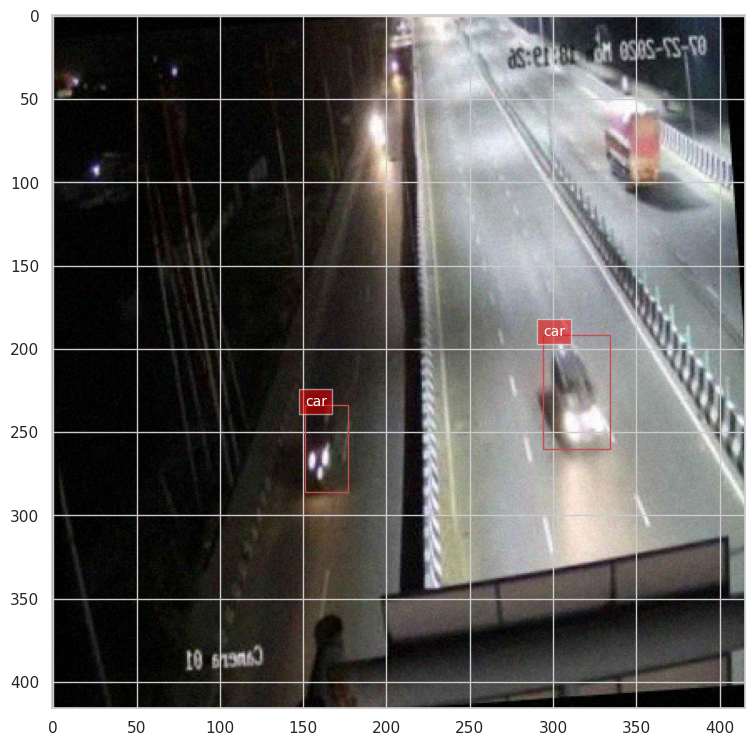

In [908]:
display_image_with_boxes(sample_img, sample_target["boxes"], class_names)

In [909]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        
        # First convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # Second convolutional layer
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(32)
        
        # Third convolutional layer
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(64)
        
        # Fully connected layers
        self.fc1 = nn.Linear(64 * 32 * 32, 512)  # Assuming the input image size is 256x256
        self.fc2 = nn.Linear(512, num_classes)
        
    def forward(self, x):
        x = self.pool(F.relu(self.batchnorm1(self.conv1(x))))
        x = self.pool(F.relu(self.batchnorm2(self.conv2(x))))
        x = self.pool(F.relu(self.batchnorm3(self.conv3(x))))
        
        # Flatten the tensor
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

In [910]:
import torch.optim as optim

# Define the model
model = SimpleCNN(num_classes=7)
model.to(device)  # Move the model to the GPU if available

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust learning rate as necessary

In [911]:
len(targets)

2

In [912]:
targets

[tensor([[[0.0353, 0.4745, 0.5451,  ..., 0.0157, 0.0157, 0.0157],
          [0.0353, 0.5373, 0.5294,  ..., 0.0157, 0.0157, 0.0157],
          [0.0353, 0.6078, 0.5176,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],
 
         [[0.0353, 0.5490, 0.6196,  ..., 0.0157, 0.0157, 0.0157],
          [0.0353, 0.6118, 0.6039,  ..., 0.0157, 0.0157, 0.0157],
          [0.0353, 0.6784, 0.5922,  ..., 0.0157, 0.0157, 0.0157],
          ...,
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
          [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157]],
 
         [[0.0235, 0.4627, 0.5333,  ..., 0.0157, 0.0157, 0.0157],
          [0.0235, 0.5255, 0.5176,  ..., 0.0157, 0.0157, 0.0157],
          [0.0235, 0.6078, 0.5059,  ...,

In [916]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

for i, (img, target) in enumerate(train_loader):
    image = image.to(device)
    target['boxes'] = target['boxes'].to(device)
    target['labels'] = target['labels'].to(device)
    target['image_id'] = target['image_id'].to(device)
    
    # Your processing or model training code goes here


KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_32/245518470.py", line 32, in __getitem__
    augmented = self.albu_transform(image=image)
  File "/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py", line 207, in __call__
    p.preprocess(data)
  File "/opt/conda/lib/python3.10/site-packages/albumentations/core/utils.py", line 83, in preprocess
    data[data_name] = self.check_and_convert(data[data_name], rows, cols, direction="to")
KeyError: 'bboxes'


In [826]:
num_epochs = 10


for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, batch in enumerate(training_loader, 0):
        # Unpack the batch
        inputs = [item[0] for item in batch]
        targets = [item[1] for item in batch]

        # Convert lists to tensors
        inputs = torch.stack(inputs).to(device)
        labels = torch.tensor([target["labels"].item() for target in targets]).to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass, backward pass, and optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # Print statistics
        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 batches
            print(f"[{epoch + 1}, {i + 1}] loss: {running_loss / 100:.3f}")
            running_loss = 0.0


KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_32/245518470.py", line 32, in __getitem__
    augmented = self.albu_transform(image=image)
  File "/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py", line 207, in __call__
    p.preprocess(data)
  File "/opt/conda/lib/python3.10/site-packages/albumentations/core/utils.py", line 83, in preprocess
    data[data_name] = self.check_and_convert(data[data_name], rows, cols, direction="to")
KeyError: 'bboxes'


In [682]:
print(len(bboxes))

NameError: name 'bboxes' is not defined

In [ ]:
 # This assumes 'labels' is a key in your dictionary

    # rest of your training loop...


In [771]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()
            
    print(f"Epoch {epoch+1}/{num_epochs}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {100.*correct/total:.2f}%")


KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.10/site-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/tmp/ipykernel_32/245518470.py", line 32, in __getitem__
    augmented = self.albu_transform(image=image)
  File "/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py", line 207, in __call__
    p.preprocess(data)
  File "/opt/conda/lib/python3.10/site-packages/albumentations/core/utils.py", line 83, in preprocess
    data[data_name] = self.check_and_convert(data[data_name], rows, cols, direction="to")
KeyError: 'bboxes'


In [ ]:
/kaggle/input/dataset-vehicle1/images/Highway_0_2020-07-30_jpg.rf.7d947cc31b302b22a527ecd17d3af963.jpg